In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error


In [2]:
# Load data.
data = pd.read_csv('supermarket_sales.csv')
data.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [3]:
"""
- Clean Data.
- Check null values
- Convert categorical values into numerical format
"""

data.isnull().count()

# data.fillna(data.mean(), inplace=True)

# data['Payment'] = pd.factorize(data['Payment'][0])

Invoice ID                 1000
Branch                     1000
City                       1000
Customer type              1000
Gender                     1000
Product line               1000
Unit price                 1000
Quantity                   1000
Tax 5%                     1000
Total                      1000
Date                       1000
Time                       1000
Payment                    1000
cogs                       1000
gross margin percentage    1000
gross income               1000
Rating                     1000
dtype: int64

In [4]:
data[data['Quantity'] > 2].head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [17]:
import pandas as pd

def getDataByBranch(data: pd.DataFrame, branch_name: str):
    if data is not None and 'Branch' in data.columns:
        # Filter rows where 'Branch' matches the given branch_name
        return data[data['Branch'] == branch_name]
    else:
        # Handle invalid data
        return pd.DataFrame()  # Return an empty DataFrame

# Example usage
filtered_data = getDataByBranch(data, 'A')
filtered_data[data['Quantity'] > 2]

# 270 sales has quantity over 2 in Branch


/var/folders/t8/3sggsgnd6l5b6hy80l4xzr540000gn/T/ipykernel_4413/673018261.py:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  filtered_data[data['Quantity'] > 2]


,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3
6,355-53-5943,A,Yangon,Member,Female,Electronic accessories,68.84,6,20.6520,433.6920,2/25/2019,14:36,Ewallet,413.04,4.761905,20.6520,5.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
976,221-25-5073,A,Yangon,Normal,Female,Food and beverages,74.66,4,14.9320,313.5720,3/4/2019,10:39,Cash,298.64,4.761905,14.9320,8.5
981,809-46-1866,A,Yangon,Normal,Male,Health and beauty,58.15,4,11.6300,244.2300,1/23/2019,17:44,Cash,232.60,4.761905,11.6300,8.4
982,139-32-4183,A,Yangon,Member,Female,Sports and travel,97.48,9,43.8660,921.1860,3/14/2019,14:19,Ewallet,877.32,4.761905,43.8660,7.4
990,886-18-2897,A,Yangon,Normal,Female,Food and beverages,56.56,5,14.1400,296.9400,3/22/2019,19:06,Credit card,282.80,4.761905,14.1400,4.5


In [18]:
import pandas as pd

def getDataByBranch(data: pd.DataFrame, branch_name: str):
    if data is not None and 'Branch' in data.columns:
        # Filter rows where 'Branch' matches the given branch_name
        return data[data['Branch'] == branch_name]
    else:
        # Handle invalid data
        return pd.DataFrame()  # Return an empty DataFrame

# Example usage
filtered_data = getDataByBranch(data, 'B')
filtered_data[data['Quantity'] > 2]

# 270 sales has quantity over 2 in Branch


/var/folders/t8/3sggsgnd6l5b6hy80l4xzr540000gn/T/ipykernel_4413/4293028953.py:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  filtered_data[data['Quantity'] > 2]


,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
9,692-92-5582,B,Mandalay,Member,Female,Food and beverages,54.84,3,8.226,172.746,2/20/2019,13:27,Credit card,164.52,4.761905,8.226,5.9
10,351-62-0822,B,Mandalay,Member,Female,Fashion accessories,14.48,4,2.896,60.816,2/6/2019,18:07,Ewallet,57.92,4.761905,2.896,4.5
11,529-56-3974,B,Mandalay,Member,Male,Electronic accessories,25.51,4,5.102,107.142,3/9/2019,17:03,Cash,102.04,4.761905,5.102,6.8
15,299-46-1805,B,Mandalay,Member,Female,Sports and travel,93.72,6,28.116,590.436,1/15/2019,16:19,Cash,562.32,4.761905,28.116,4.5
21,371-85-5789,B,Mandalay,Normal,Male,Health and beauty,87.98,3,13.197,277.137,3/5/2019,10:40,Ewallet,263.94,4.761905,13.197,5.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
987,552-44-5977,B,Mandalay,Member,Male,Health and beauty,62.00,8,24.800,520.800,1/3/2019,19:08,Credit card,496.00,4.761905,24.800,6.2
989,430-53-4718,B,Mandalay,Member,Male,Health and beauty,75.37,8,30.148,633.108,1/28/2019,15:46,Credit card,602.96,4.761905,30.148,8.4
991,602-16-6955,B,Mandalay,Normal,Female,Sports and travel,76.60,10,38.300,804.300,1/24/2019,18:10,Ewallet,766.00,4.761905,38.300,6.0
993,690-01-6631,B,Mandalay,Normal,Male,Fashion accessories,17.49,10,8.745,183.645,2/22/2019,18:35,Ewallet,174.90,4.761905,8.745,6.6


In [19]:
import pandas as pd

def getDataByBranch(data: pd.DataFrame, branch_name: str):
    if data is not None and 'Branch' in data.columns:
        # Filter rows where 'Branch' matches the given branch_name
        return data[data['Branch'] == branch_name]
    else:
        # Handle invalid data
        return pd.DataFrame()  # Return an empty DataFrame

# Example usage
filtered_data = getDataByBranch(data, 'C')
filtered_data[data['Quantity'] > 2]

# 270 sales has quantity over 2 in Branch


/var/folders/t8/3sggsgnd6l5b6hy80l4xzr540000gn/T/ipykernel_4413/2705808068.py:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  filtered_data[data['Quantity'] > 2]


,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
5,699-14-3026,C,Naypyitaw,Normal,Male,Electronic accessories,85.39,7,29.8865,627.6165,3/25/2019,18:30,Ewallet,597.73,4.761905,29.8865,4.1
7,315-22-5665,C,Naypyitaw,Normal,Female,Home and lifestyle,73.56,10,36.7800,772.3800,2/24/2019,11:38,Ewallet,735.60,4.761905,36.7800,8.0
20,300-71-4605,C,Naypyitaw,Member,Male,Electronic accessories,86.04,5,21.5100,451.7100,2/25/2019,11:24,Ewallet,430.20,4.761905,21.5100,4.8
34,183-56-6882,C,Naypyitaw,Member,Female,Food and beverages,99.42,4,19.8840,417.5640,2/6/2019,10:42,Ewallet,397.68,4.761905,19.8840,7.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
963,364-34-2972,C,Naypyitaw,Member,Male,Electronic accessories,96.82,3,14.5230,304.9830,3/30/2019,20:37,Cash,290.46,4.761905,14.5230,6.7
980,728-47-9078,C,Naypyitaw,Member,Male,Food and beverages,59.59,4,11.9180,250.2780,1/19/2019,12:46,Cash,238.36,4.761905,11.9180,9.8
983,148-41-7930,C,Naypyitaw,Normal,Male,Health and beauty,99.96,7,34.9860,734.7060,1/23/2019,10:33,Cash,699.72,4.761905,34.9860,6.1
984,189-40-5216,C,Naypyitaw,Normal,Male,Electronic accessories,96.37,7,33.7295,708.3195,1/9/2019,11:40,Cash,674.59,4.761905,33.7295,6.0


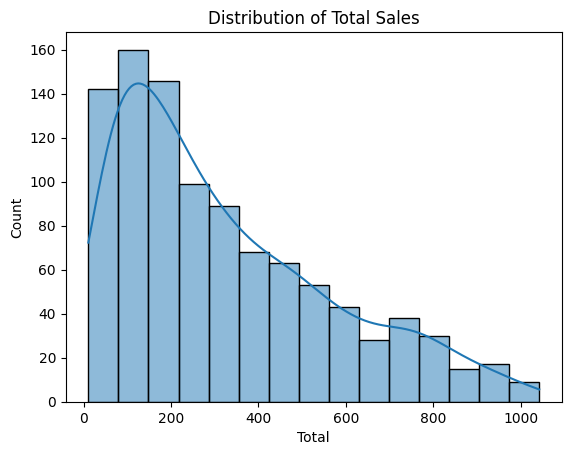

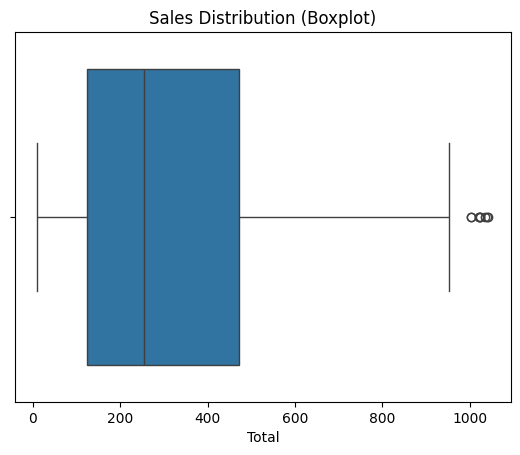

In [21]:
# Histogram for total sales distribution
sns.histplot(data['Total'], kde=True)  # KDE adds a smoothed line
plt.title('Distribution of Total Sales')
plt.show()

# Boxplot to check sales distribution and outliers
sns.boxplot(x=data['Total'])
plt.title('Sales Distribution (Boxplot)')
plt.show()


In [29]:
# Calculating average/MEAN.

avg = sum(data['Total']) / len(data['Total'])

avg = data['Total'].mean()

avg


322.966749

In [30]:
# Cleaning data - In progress